In [ ]:
[1]*10**10 #get more ram quickly

In [ ]:
#test GPU
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
   raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
print(tf.__version__)

Found GPU at: /device:GPU:0
2.3.0


In [3]:
from google.colab import drive
 
drive.mount('/gdrive')
# the project's folder
%cd /gdrive/'My Drive'/credit_card

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive/My Drive/credit_card


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 300

In [18]:
#credit card images folder
%cd /gdrive/'My Drive'/credit_card/data

/gdrive/My Drive/credit_card/data


Text(0.5, 1.0, 'credit card2 numbers')

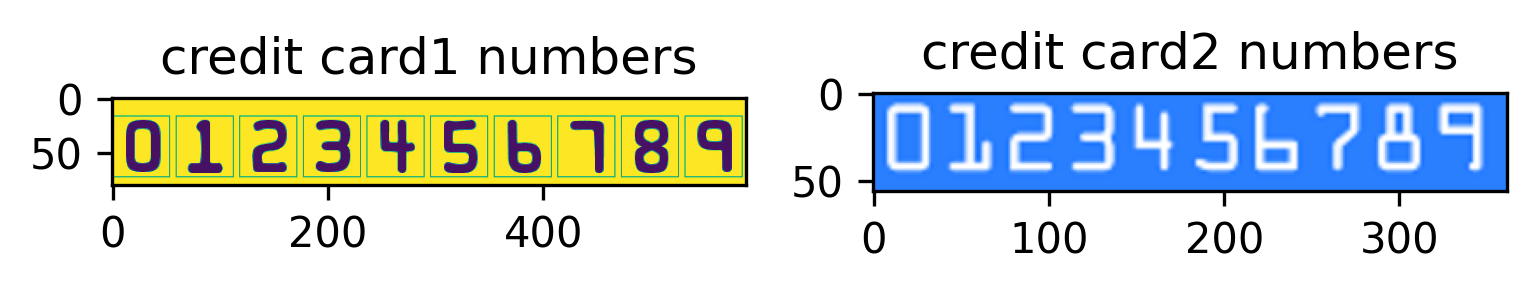

In [20]:
#show the two images 
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
credit_card1 = cv2.imread('carte1.jpg', 0)
imgplot = plt.imshow(credit_card1)
ax.set_title('credit card1 numbers')

ax = fig.add_subplot(1, 2, 2)
credit_card2 = cv2.imread('carte2.jpg', 1)
imgplot = plt.imshow(credit_card2)

ax.set_title('credit card2 numbers')


In [ ]:
#Create our dataset directories .For each digit this function creates a folder

import os

def makedir(folder):
  """Creates a new directory if it does not exist"""
  if not os.path.exists(folder):
    os.makedirs(folder)
    return None, 0
    
for i in range(0,10):
  folder_name = "/gdrive/My Drive/credit_card/model_training/train/"+str(i)
  print(folder_name)
  makedir(folder_name) 

for i in range(0,10):
  folder_name = "/gdrive/My Drive/credit_card/model_training/test/"+str(i)
  print(folder_name)
  makedir(folder_name)

/gdrive/My Drive/credit_card/model_training/train/0
/gdrive/My Drive/credit_card/model_training/train/1
/gdrive/My Drive/credit_card/model_training/train/2
/gdrive/My Drive/credit_card/model_training/train/3
/gdrive/My Drive/credit_card/model_training/train/4
/gdrive/My Drive/credit_card/model_training/train/5
/gdrive/My Drive/credit_card/model_training/train/6
/gdrive/My Drive/credit_card/model_training/train/7
/gdrive/My Drive/credit_card/model_training/train/8
/gdrive/My Drive/credit_card/model_training/train/9
/gdrive/My Drive/credit_card/model_training/test/0
/gdrive/My Drive/credit_card/model_training/test/1
/gdrive/My Drive/credit_card/model_training/test/2
/gdrive/My Drive/credit_card/model_training/test/3
/gdrive/My Drive/credit_card/model_training/test/4
/gdrive/My Drive/credit_card/model_training/test/5
/gdrive/My Drive/credit_card/model_training/test/6
/gdrive/My Drive/credit_card/model_training/test/7
/gdrive/My Drive/credit_card/model_training/test/8
/gdrive/My Drive/cred

In [8]:
%cd /gdrive/'My Drive'/credit_card/model_training

/gdrive/My Drive/credit_card/model_training


In [9]:

from augmentation_image import *

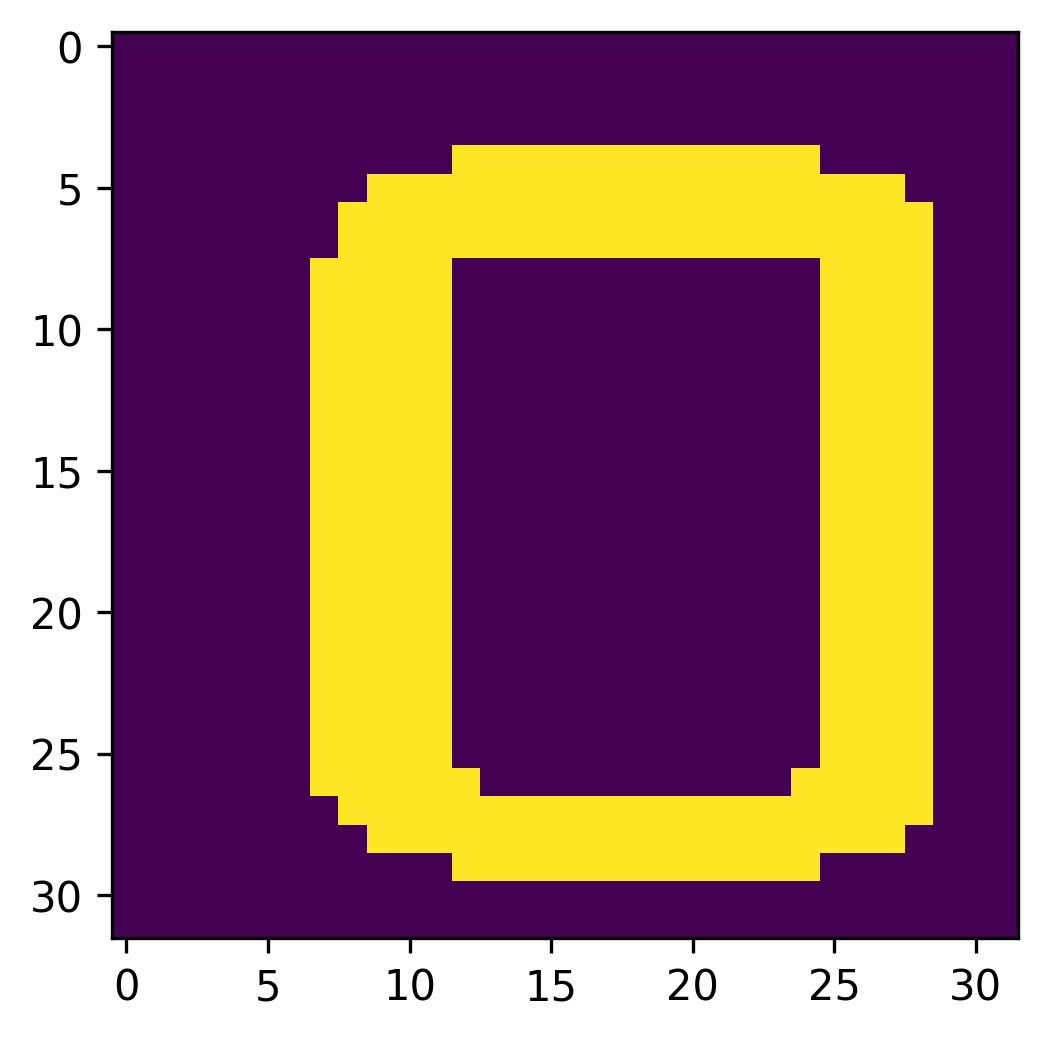

In [19]:
credit_card = cv2.imread('carte2.jpg',0)
_, th2 = cv2.threshold(credit_card, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow( credit_card)



# This is the coordinates of the region enclosing  the first digit
# This is preset and was done manually based on this specific image
region = [(0, 0), (35, 48)]

# Assigns values to each region for ease of interpretation
top_left_y = region[0][1]
bottom_right_y = region[1][1]
top_left_x = region[0][0]
bottom_right_x = region[1][0]

for i in range(0,1): #We only look at the first digit in testing out augmentation_image functions
    roi = credit_card[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
    for j in range(0,10):
        roi2 = noise_pixelate_strech_image(roi)
        roi_otsu = pre_process_image(roi2, inv = False)
        plt.imshow(roi_otsu)
        #cv2.waitKey(0)
        
#cv2.destroyAllWindows()

Augmenting Digit -  0
Augmenting Digit -  1
Augmenting Digit -  2
Augmenting Digit -  3
Augmenting Digit -  4
Augmenting Digit -  5
Augmenting Digit -  6
Augmenting Digit -  7
Augmenting Digit -  8
Augmenting Digit -  9


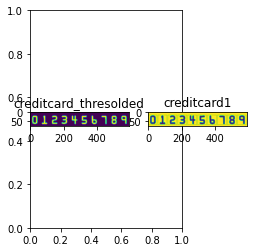

In [ ]:
# Creating 2000 Images for each digit in creditcard_digits1 - TRAINING DATA
#/gdrive/My Drive/credit_card/model_training/test/

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)

# Load our first image
cc1 = cv2.imread('/gdrive/My Drive/credit_card/data/carte1.jpg', 0)

_, th2 = cv2.threshold(cc1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
ax = fig.add_subplot(1, 3, 1)
plt.imshow(th2)
ax.set_title('creditcard_thresolded')
ax = fig.add_subplot(1, 3, 2)
plt.imshow( cc1)
ax.set_title('creditcard1')


region = [(2, 19), (50, 72)]

top_left_y = region[0][1]
bottom_right_y = region[1][1]
top_left_x = region[0][0]
bottom_right_x = region[1][0]

for i in range(0,10):   
  # We jump the next digit each time we loop
  if i > 0:
    top_left_x = top_left_x + 59
    bottom_right_x = bottom_right_x + 59

  roi = cc1[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
  print("Augmenting Digit - ", str(i))
    # We create 200 versions of each image for our dataset
  for j in range(0,2000):
    roi2 = noise_pixelate_strech_image(roi)
    roi_otsu = pre_process_image(roi2, inv = True)
    cv2.imwrite("/gdrive/My Drive/credit_card/model_training/train/"+str(i)+"/_1_"+str(j)+".jpg", roi_otsu)


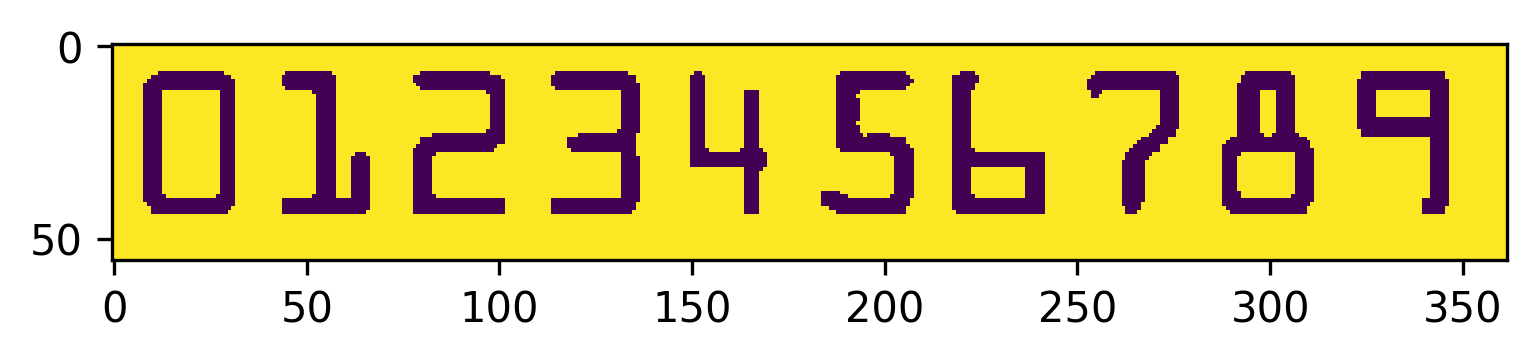

In [ ]:
# Load our first image
cc2 = cv2.imread('/gdrive/My Drive/credit_card/data/carte2.jpg', 0)

_, th2 = cv2.threshold(cc2, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
ax = fig.add_subplot(1, 3, 1)
plt.imshow(th2)

Augmenting Digit -  0
Augmenting Digit -  1
Augmenting Digit -  2
Augmenting Digit -  3
Augmenting Digit -  4
Augmenting Digit -  5
Augmenting Digit -  6
Augmenting Digit -  7
Augmenting Digit -  8
Augmenting Digit -  9


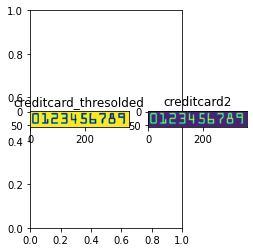

In [ ]:
# Creating 2000 Images for each digit in creditcard_digits2 - TRAINING DATA
#/gdrive/My Drive/credit_card/model_training/test/

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)

# Load our first image
cc2 = cv2.imread('/gdrive/My Drive/credit_card/data/carte2.jpg', 0)

_, th2 = cv2.threshold(cc2, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
ax = fig.add_subplot(1, 3, 1)
plt.imshow(th2)
ax.set_title('creditcard_thresolded')
ax = fig.add_subplot(1, 3, 2)
plt.imshow( cc2)
ax.set_title('creditcard2')

region = [(0, 0), (35, 48)]

top_left_y = region[0][1]
bottom_right_y = region[1][1]
top_left_x = region[0][0]
bottom_right_x = region[1][0]


for i in range(0,10):   
  # We jump the next digit each time we loop
  if i > 0:
    top_left_x = top_left_x + 35
    bottom_right_x = bottom_right_x + 35

  roi = cc2[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
  print("Augmenting Digit - ", str(i))
    # We create 2000 versions of each image for our dataset
  for j in range(0,2000):
    roi2 = noise_pixelate_strech_image(roi)
    roi_otsu = pre_process_image(roi2, inv = False)
    cv2.imwrite("/gdrive/My Drive/credit_card/model_training/train/"+str(i)+"/_2_"+str(j)+".jpg", roi_otsu)


Augmenting Digit -  0
Augmenting Digit -  1
Augmenting Digit -  2
Augmenting Digit -  3
Augmenting Digit -  4
Augmenting Digit -  5
Augmenting Digit -  6
Augmenting Digit -  7
Augmenting Digit -  8
Augmenting Digit -  9


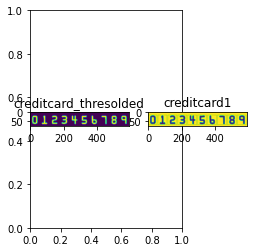

In [ ]:
# Creating 200 Images for each digit in creditcard_digits1 - TESTING DATA
#/gdrive/My Drive/credit_card/model_training/test/

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)

# Load our first image
cc1 = cv2.imread('/gdrive/My Drive/credit_card/data/carte1.jpg', 0)

_, th2 = cv2.threshold(cc1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
ax = fig.add_subplot(1, 3, 1)
plt.imshow(th2)
ax.set_title('creditcard_thresolded')
ax = fig.add_subplot(1, 3, 2)
plt.imshow( cc1)
ax.set_title('creditcard1')


region = [(2, 19), (50, 72)]

top_left_y = region[0][1]
bottom_right_y = region[1][1]
top_left_x = region[0][0]
bottom_right_x = region[1][0]

for i in range(0,10):   
  # We jump the next digit each time we loop
  if i > 0:
    top_left_x = top_left_x + 59
    bottom_right_x = bottom_right_x + 59

  roi = cc1[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
  print("Augmenting Digit - ", str(i))
    # We create 200 versions of each image for our dataset
  for j in range(0,200):
    roi2 = noise_pixelate_strech_image(roi)
    roi_otsu = pre_process_image(roi2, inv = True)
    cv2.imwrite("/gdrive/My Drive/credit_card/model_training/test/"+str(i)+"/_1_"+str(j)+".jpg", roi_otsu)


Augmenting Digit -  0
Augmenting Digit -  1
Augmenting Digit -  2
Augmenting Digit -  3
Augmenting Digit -  4
Augmenting Digit -  5
Augmenting Digit -  6
Augmenting Digit -  7
Augmenting Digit -  8
Augmenting Digit -  9


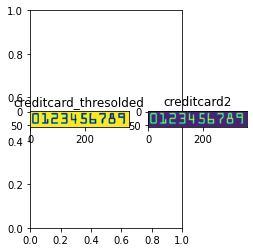

In [ ]:
# Creating 200 Images for each digit in creditcard_digits1 - TESTING DATA
#/gdrive/My Drive/credit_card/model_training/test/

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)

# Load our first image
cc2 = cv2.imread('/gdrive/My Drive/credit_card/data/carte2.jpg', 0)

_, th2 = cv2.threshold(cc2, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
ax = fig.add_subplot(1, 3, 1)
plt.imshow(th2)
ax.set_title('creditcard_thresolded')
ax = fig.add_subplot(1, 3, 2)
plt.imshow( cc2)
ax.set_title('creditcard2')

region = [(0, 0), (35, 48)]

top_left_y = region[0][1]
bottom_right_y = region[1][1]
top_left_x = region[0][0]
bottom_right_x = region[1][0]


for i in range(0,10):   
  # We jump the next digit each time we loop
  if i > 0:
    top_left_x = top_left_x + 35
    bottom_right_x = bottom_right_x + 35

  roi = cc2[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
  print("Augmenting Digit - ", str(i))
    # We create 200 versions of each image for our dataset
  for j in range(0,200):
    roi2 = noise_pixelate_strech_image(roi)
    roi_otsu = pre_process_image(roi2, inv = False)
    cv2.imwrite("/gdrive/My Drive/credit_card/model_training/test/"+str(i)+"/_2_"+str(j)+".jpg", roi_otsu)


TRAINING


In [ ]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
import keras

input_shape = (32, 32, 3)
img_width = 32
img_height = 32
num_classes = 10
nb_train_samples = 40000
nb_validation_samples = 4000
batch_size = 16
epochs = 10
#/gdrive/My Drive/credit_card/model_training/train/
train_data_dir = '/gdrive/My Drive/credit_card/model_training/train/'
validation_data_dir = '/gdrive/My Drive/credit_card/model_training/test/'

# Creating our data generator for our test data
validation_datagen = ImageDataGenerator(
    # used to rescale the pixel values from [0, 255] to [0, 1] interval
    rescale = 1./255)

# Creating our data generator for our training data
train_datagen = ImageDataGenerator(
  rescale = 1./255,              # normalize pixel values to [0,1]
  rotation_range = 10,           # randomly applies rotations
  width_shift_range = 0.25,       # randomly applies width shifting
  height_shift_range = 0.25,      # randomly applies height shifting
  shear_range=0.5,
  zoom_range=0.5,
  horizontal_flip = False,        # randonly flips the image
  fill_mode = 'nearest')         # uses the fill mode nearest to fill gaps created by the above

# Specify criteria about our training data, such as the directory, image size, batch size and type 
# automagically retrieve images and their classes for train and validation sets
train_generator = train_datagen.flow_from_directory(
  train_data_dir,
  target_size = (img_width, img_height),
  batch_size = batch_size,
  class_mode = 'categorical')

validation_generator = validation_datagen.flow_from_directory(
  validation_data_dir,
  target_size = (img_width, img_height),
  batch_size = batch_size,
  class_mode = 'categorical',
  shuffle = False)    

Found 40000 images belonging to 10 classes.
Found 4000 images belonging to 10 classes.


In [ ]:
# create model Lenet
model = Sequential()

# 2 sets of CRP (Convolution, RELU, Pooling)
model.add(Conv2D(20, (5, 5),padding = "same", input_shape = input_shape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

model.add(Conv2D(50, (5, 5),padding = "same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

# Fully connected layers (w/ RELU)
model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))

# Softmax (for classification)
model.add(Dense(num_classes))
model.add(Activation("softmax"))
           
model.compile(loss = 'categorical_crossentropy',
  optimizer = keras.optimizers.Adadelta(),
  metrics = ['accuracy'])
    
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 20)        1520      
_________________________________________________________________
activation (Activation)      (None, 32, 32, 20)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 50)        25050     
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 50)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 50)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0

In [ ]:
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping
                   
checkpoint = ModelCheckpoint("/gdrive/My Drive/credit_card/model_training/trained_model/credit_card.h5",
      monitor="val_loss",
      mode="min",
     save_best_only = True,
      verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
     min_delta = 0, 
    patience = 8,
     verbose = 1,
   restore_best_weights = True)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint]

# Note we use a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
    optimizer = RMSprop(lr = 0.001),
    metrics = ['accuracy'])



history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Epoch 1/10
2499/2500 [============================>.] - ETA: 0s - loss: 0.1128 - accuracy: 0.9651
Epoch 00001: val_loss improved from inf to 0.00026, saving model to /gdrive/My Drive/credit_card/model_training/trained_model/credit_card.h5
2500/2500 [==============================] - 93s 37ms/step - loss: 0.1127 - accuracy: 0.9651 - val_loss: 2.6360e-04 - val_accuracy: 1.0000
Epoch 2/10
2499/2500 [============================>.] - ETA: 0s - loss: 0.0990 - accuracy: 0.9706
Epoch 00002: val_loss did not improve from 0.00026
2500/2500 [==============================] - 94s 37ms/step - loss: 0.0990 - accuracy: 0.9706 - val_loss: 0.0019 - val_accuracy: 0.9995
Epoch 3/10
2499/2500 [============================>.] - ETA: 0s - loss: 0.0967 - accuracy: 0.9723
Epoch 00003: val_loss did not improve from 0.00026
2500/2500 [==============================] - 94s 38ms/step - loss: 0.0966 - accuracy: 0.9723 - val_loss: 9.6485e-04 - val_accuracy: 0.9992
Epoch 4/10
2499/2500 [============================

In [ ]:
#save the model after training
model.save("/gdrive/My Drive/credit_card/model_training/trained_model/credit_card.h5")

In [23]:
#https://www.pyimagesearch.com/2014/08/25/4-point-opencv-getperspective-transform-example/
import cv2
import numpy as np
import imutils
#from skimage.filters import threshold_adaptive
import os
#https://www.pyimagesearch.com/2014/08/25/4-point-opencv-getperspective-transform-example/

def order_points(pts):
  # initialzie a list of coordinates that will be ordered
  # such that the first entry in the list is the top-left,
  # the second entry is the top-right, the third is the
  # bottom-right, and the fourth is the bottom-left
  rect = np.zeros((4, 2), dtype = "float32")

  # the top-left point will have the smallest sum, whereas
  # the bottom-right point will have the largest sum
  s = pts.sum(axis = 1)
  rect[0] = pts[np.argmin(s)]
  rect[2] = pts[np.argmax(s)]

  # now, compute the difference between the points, the
  # top-right point will have the smallest difference,
  # whereas the bottom-left will have the largest difference
  diff = np.diff(pts, axis = 1)
  rect[1] = pts[np.argmin(diff)]
  rect[3] = pts[np.argmax(diff)]

  # return the ordered coordinates
  return rect

def four_point_transform(image, pts):
  # obtain a consistent order of the points and unpack them
  # individually
  rect = order_points(pts)
  (tl, tr, br, bl) = rect

    # compute the width of the new image, which will be the
    # maximum distance between bottom-right and bottom-left
    # x-coordiates or the top-right and top-left x-coordinates
  widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
  widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
  maxWidth = max(int(widthA), int(widthB))

  # compute the height of the new image, which will be the
  # maximum distance between the top-right and bottom-right
  # y-coordinates or the top-left and bottom-left y-coordinates
  heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
  heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
  maxHeight = max(int(heightA), int(heightB))

    # now that we have the dimensions of the new image, construct
    # the set of destination points to obtain a "birds eye view",
    # (i.e. top-down view) of the image, again specifying points
    # in the top-left, top-right, bottom-right, and bottom-left
    # order
  dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype = "float32")

    # compute the perspective transform matrix and then apply it
  M = cv2.getPerspectiveTransform(rect, dst)
  warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))

    # return the warped image
  return warped

def doc_Scan(image):
  orig_height, orig_width = image.shape[:2]
  ratio = image.shape[0] / 500.0

  orig = image.copy()
  image = imutils.resize(image, height = 500)
  orig_height, orig_width = image.shape[:2]
  Original_Area = orig_height * orig_width
    
  # convert the image to grayscale, blur it, and find edges
  # in the image
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  gray = cv2.GaussianBlur(gray, (5, 5), 0)
  edged = cv2.Canny(gray, 75, 200)
  fig = plt.figure()
  ax = fig.add_subplot(2, 2, 1)

  plt.imshow( image)
  ax.set_title('image')
  ax = fig.add_subplot(2, 2, 2)
  plt.imshow(edged)
  ax.set_title("Edged")
  

  # show the original image and the edge detected image

  # find the contours in the edged image, keeping only the
  # largest ones, and initialize the screen contour
  contours,_  = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
  contours = sorted(contours, key = cv2.contourArea, reverse = True)[:5]
    
  # loop over the contours
  for c in contours:
    # approximate the contour
    area = cv2.contourArea(c)
    if area < (Original_Area/3):
      print("Error Image Invalid")
      return("ERROR")
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    # if our approximated contour has four points, then we
    # can assume that we have found our screen
    if len(approx) == 4:
      screenCnt = approx
      break

    # show the contour (outline) of the piece of paper
  cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 2)
  ax = fig.add_subplot(2, 2, 3)
  plt.imshow(image)
  ax.set_title("outline")
 

  warped = four_point_transform(orig, screenCnt.reshape(4, 2) * ratio)
  # convert the warped image to grayscale, then threshold it
  # to give it that 'black and white' paper effect
  cv2.resize(warped, (640,403), interpolation = cv2.INTER_AREA)
  cv2.imwrite("/gdrive/My Drive/credit_card/data/credit_card_color.jpg", warped)
  warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
  warped = warped.astype("uint8") * 255
  ax = fig.add_subplot(2, 2, 4)
  plt.imshow( warped)
  ax.set_title("Extracted Credit Card")
  return warped


def x_cord_contour(contours):
  #Returns the X cordinate for the contour centroid
  if cv2.contourArea(contours) > 10:
    M = cv2.moments(contours)
    return (int(M['m10']/M['m00']))
  else:
    pass

True

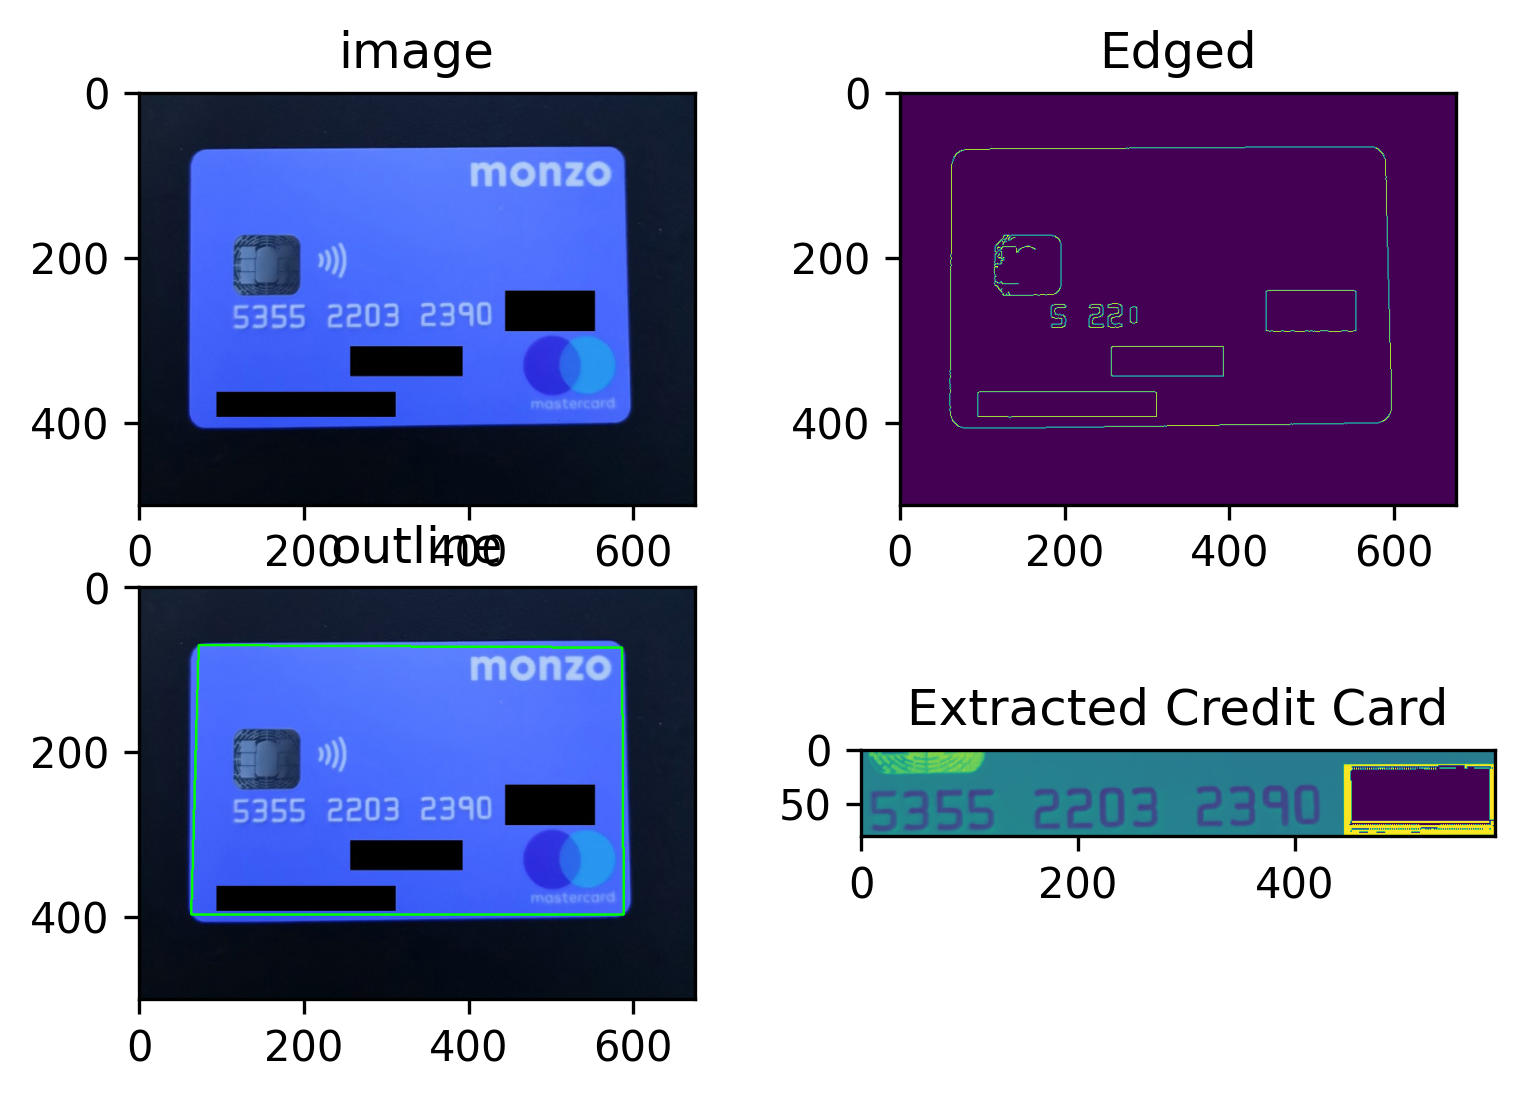

In [ ]:
image = cv2.imread('/gdrive/My Drive/credit_card/data/test_card.jpg')
image = doc_Scan(image)

region = [(55, 210), (640, 290)]

top_left_y = region[0][1]
bottom_right_y = region[1][1]
top_left_x = region[0][0]
bottom_right_x = region[1][0]

# Extracting the area were the credit numbers are located
roi = image[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
plt.imshow( roi)
cv2.imwrite("/gdrive/My Drive/credit_card/data/credit_card_extracted_digits.jpg", roi)

In [21]:
from keras.models import load_model
import keras

classifier = load_model("/gdrive/My Drive/credit_card/model_training/trained_model/credit_card.h5")

___________Prediction_______________
5
___________Prediction_______________
3
___________Prediction_______________
5
___________Prediction_______________
5
___________Prediction_______________
2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

___________Prediction_______________
2
___________Prediction_______________
0
___________Prediction_______________
3
___________Prediction_______________
2
___________Prediction_______________
3
___________Prediction_______________
9
___________Prediction_______________
0
___________Prediction_______________
4


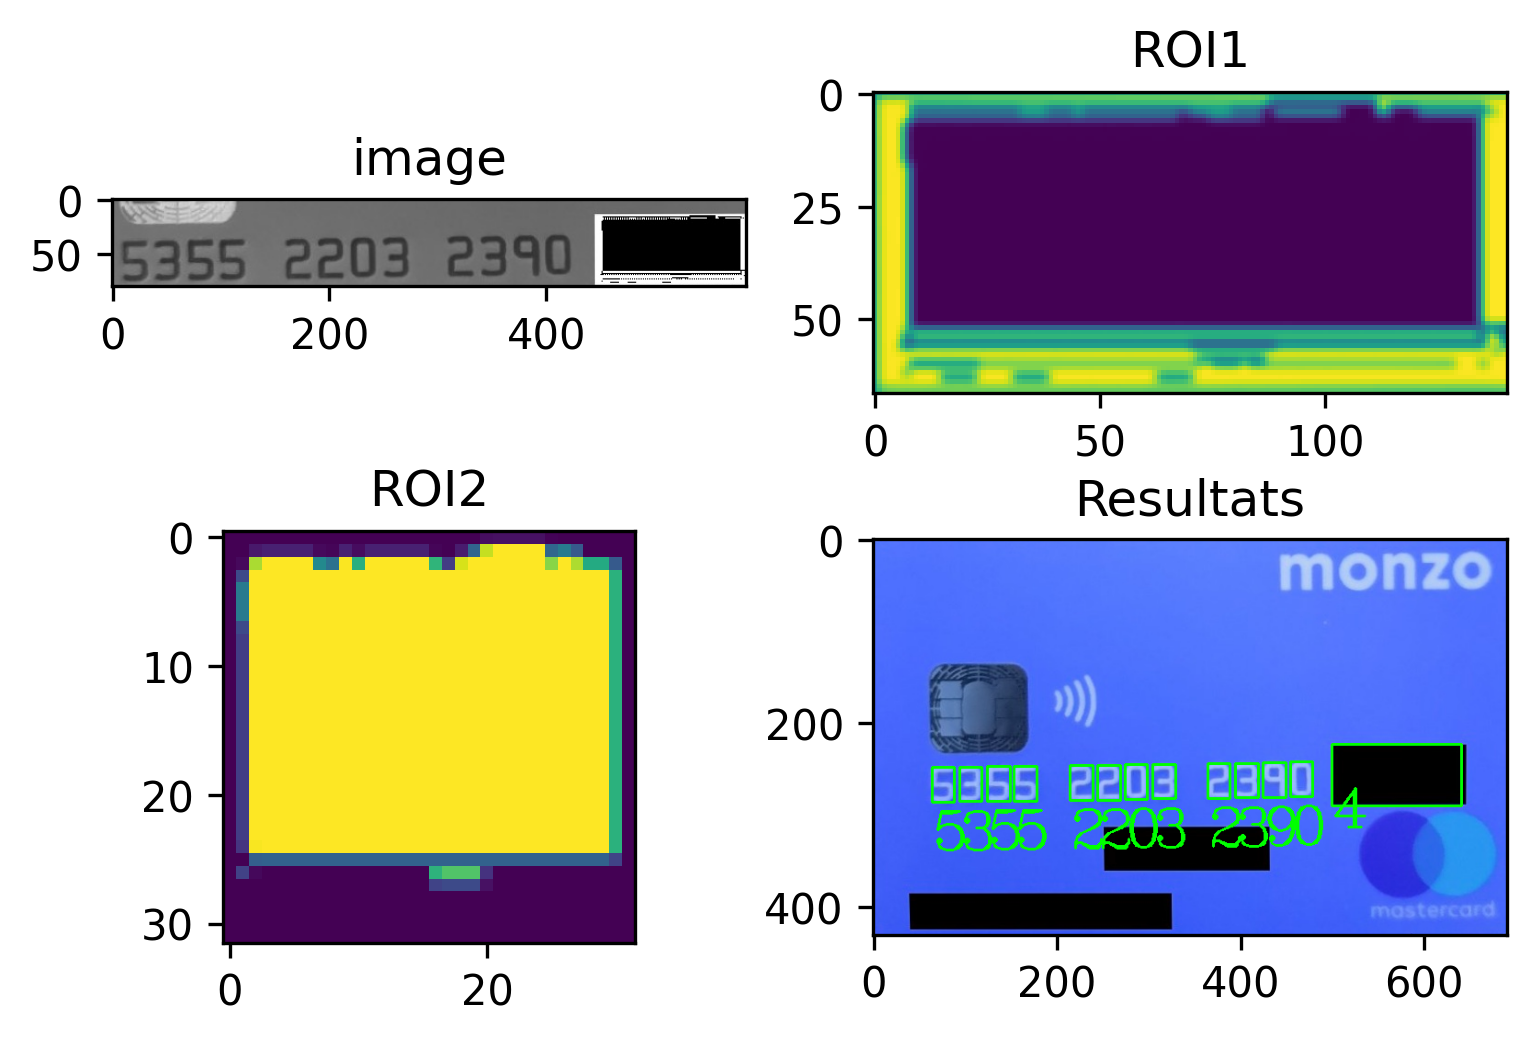

In [ ]:
img = cv2.imread('/gdrive/My Drive/credit_card/data/credit_card_extracted_digits.jpg')
orig_img = cv2.imread('/gdrive/My Drive/credit_card/data/credit_card_color.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
plt.imshow( img)
ax.set_title("extracted digits")
  
# Blur image then find edges using Canny 
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
#cv2.imshow("blurred", blurred)
#cv2.waitKey(0)

edged = cv2.Canny(blurred, 30, 150)
#cv2.imshow("edged", edged)
#cv2.waitKey(0)

# Find Contours
contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#Sort out contours left to right by using their x cordinates
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:16] #Change this to 16 to get all digits
contours = sorted(contours, key = x_cord_contour, reverse = False)

# Create empty array to store entire number
full_number = []

# loop over the contours
for c in contours:
  # compute the bounding box for the rectangle
  (x, y, w, h) = cv2.boundingRect(c)    
  if w >= 5 and h >= 25 and cv2.contourArea(c) < 1000:
     roi = blurred[y:y + h, x:x + w]
     #ret, roi = cv2.threshold(roi, 20, 255,cv2.THRESH_BINARY_INV)
     ax = fig.add_subplot(2, 2, 2)
     plt.imshow( roi)
     ax.set_title("ROI1")
     roi_otsu = pre_process_image(roi, True)
     ax = fig.add_subplot(2, 2, 3)
     plt.imshow(roi_otsu )
     ax.set_title("ROI2")
     roi_otsu = cv2.cvtColor(roi_otsu, cv2.COLOR_GRAY2RGB)
     roi_otsu = keras.preprocessing.image.img_to_array(roi_otsu)
     roi_otsu = roi_otsu * 1./255
     roi_otsu = np.expand_dims(roi_otsu, axis=0)
     image = np.vstack([roi_otsu])
     label = str(classifier.predict_classes(image, batch_size = 10))[1]
     print("___________Prediction_______________")
     print(label)
     (x, y, w, h) = (x+region[0][0], y+region[0][1], w, h)
     cv2.rectangle(orig_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
     cv2.putText(orig_img, label, (x , y + 90), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
     ax = fig.add_subplot(2, 2, 4)
     plt.imshow( orig_img)
     ax.set_title("Resultats")
    
        
